In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xlsxwriter

In [28]:
df_1 = pd.read_excel (r'./file1.xlsx') 


In [31]:
df_3 = pd.read_excel (r'./file285.xlsx') 
output_name = 'output285.xlsx'

In [32]:
df_1.head(1)

,时间,S-ZORB.CAL_H2.PV,S-ZORB.PDI_2102.PV,S-ZORB.PT_2801.PV,S-ZORB.FC_2801.PV,S-ZORB.TE_2103.PV,S-ZORB.TE_2005.PV,S-ZORB.PT_2101.PV,S-ZORB.PDT_2104.PV,S-ZORB.SIS_PDT_2103B.PV,...,S-ZORB.CAL_1.CANGLIANG.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
0,2020/5/26 8:00:00,0.276318,31.211968,2.526857,647.75238,424.6159,421.608145,2.393991,101.29058,33.480159,...,2.045436,6368.747,233.310805,83086802.0,832503.795,2216.40935,39063124.5,1840.1447,39608757.0,0.353271


In [33]:
df_3.head(1)

,时间,S-ZORB.CAL_H2.PV,S-ZORB.PDI_2102.PV,S-ZORB.PT_2801.PV,S-ZORB.FC_2801.PV,S-ZORB.TE_2103.PV,S-ZORB.TE_2005.PV,S-ZORB.PT_2101.PV,S-ZORB.PDT_2104.PV,S-ZORB.SIS_PDT_2103B.PV,...,S-ZORB.CAL_1.CANGLIANG.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
0,2017-07-17 06:03:00,0.273498,24.17817,2.528462,856.2485,421.5055,421.1933,2.426675,59.71847,1108.377,...,2.358511,3348.074,190.6698,98941230,2433273,2210.004,5147738,2846.39,5982072,-97.22112


<AxesSubplot:>

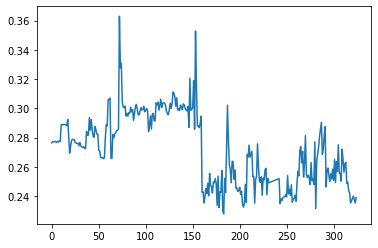

In [34]:
df_1["S-ZORB.CAL_H2.PV"].plot()

## 不同列排序相同

In [35]:
file1_col_names = list(df_1.columns) 

In [36]:
file3_col_names = list(df_3.columns) 

In [37]:
file1_col_names==file3_col_names

True

## 没有NaN

In [38]:
np.where(pd.isnull(df_3))

(array([], dtype=int64), array([], dtype=int64))

## 没有空

In [39]:
np.where(df_3.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

## variance

### 选择附件1作为参考，还是选择附件3作为参考呢？都行，都试试。

In [40]:
sigma = df_1.var() ## begin from 2nd col 

In [41]:
means = df_1.mean() ## begin from 2nd col

In [42]:
maxs = df_1.max()
mins = df_1.max()

### 验证样本方差计算

In [43]:
file1_col_names[1]

'S-ZORB.CAL_H2.PV'

In [44]:
df_1[file1_col_names[1]].mean()

0.27173163765043673

In [45]:
df_1.shape

(325, 355)

In [46]:
np.sum(np.square(df_1[file1_col_names[1]]-means[0]))/(df_1.shape[0]-1)

0.0005882845532060552

In [47]:
sigma[0]

0.0005882845532060552

## check 2nd col

In [48]:
len(means),len(sigma),len(maxs),len(mins)

(354, 354, 355, 355)

In [49]:
df_3.head(1)

,时间,S-ZORB.CAL_H2.PV,S-ZORB.PDI_2102.PV,S-ZORB.PT_2801.PV,S-ZORB.FC_2801.PV,S-ZORB.TE_2103.PV,S-ZORB.TE_2005.PV,S-ZORB.PT_2101.PV,S-ZORB.PDT_2104.PV,S-ZORB.SIS_PDT_2103B.PV,...,S-ZORB.CAL_1.CANGLIANG.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
0,2017-07-17 06:03:00,0.273498,24.17817,2.528462,856.2485,421.5055,421.1933,2.426675,59.71847,1108.377,...,2.358511,3348.074,190.6698,98941230,2433273,2210.004,5147738,2846.39,5982072,-97.22112


In [24]:
for index in range(df_3.shape[0]):
    for i in range(means.size):
        if df_3.iloc[index,i+1] > means[i] + 3*sigma[i]:
            df_3.iloc[index,i+1] = means[i] + 3*sigma[i]
            print("change max in row ",index," col ",i+1," ",df_3.iloc[index,i+1])
        if df_3.iloc[index,i+1] < means[i] - 3*sigma[i]:
            df_3.iloc[index,i+1] = means[i] - 3*sigma[i]
            print("change min in row ",index," col ",i+1," ",df_3.iloc[index,i+1])

In [25]:
df_3.to_excel(output_name, engine='xlsxwriter')

In [26]:
1.0/250

0.004